# <b>The project aim is to build an unsupervised machine learning model to detect fraud in credit card transaction.<b>

Dataset link: https://www.kaggle.com/datasets/arshiyakishore/credit-card-fraud-detection-dataset

# <b>Import required packages :)<b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.isnull().value_counts()

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
Name: count, dtype: int64

# <b>Check all feature are normally distributed?<b>

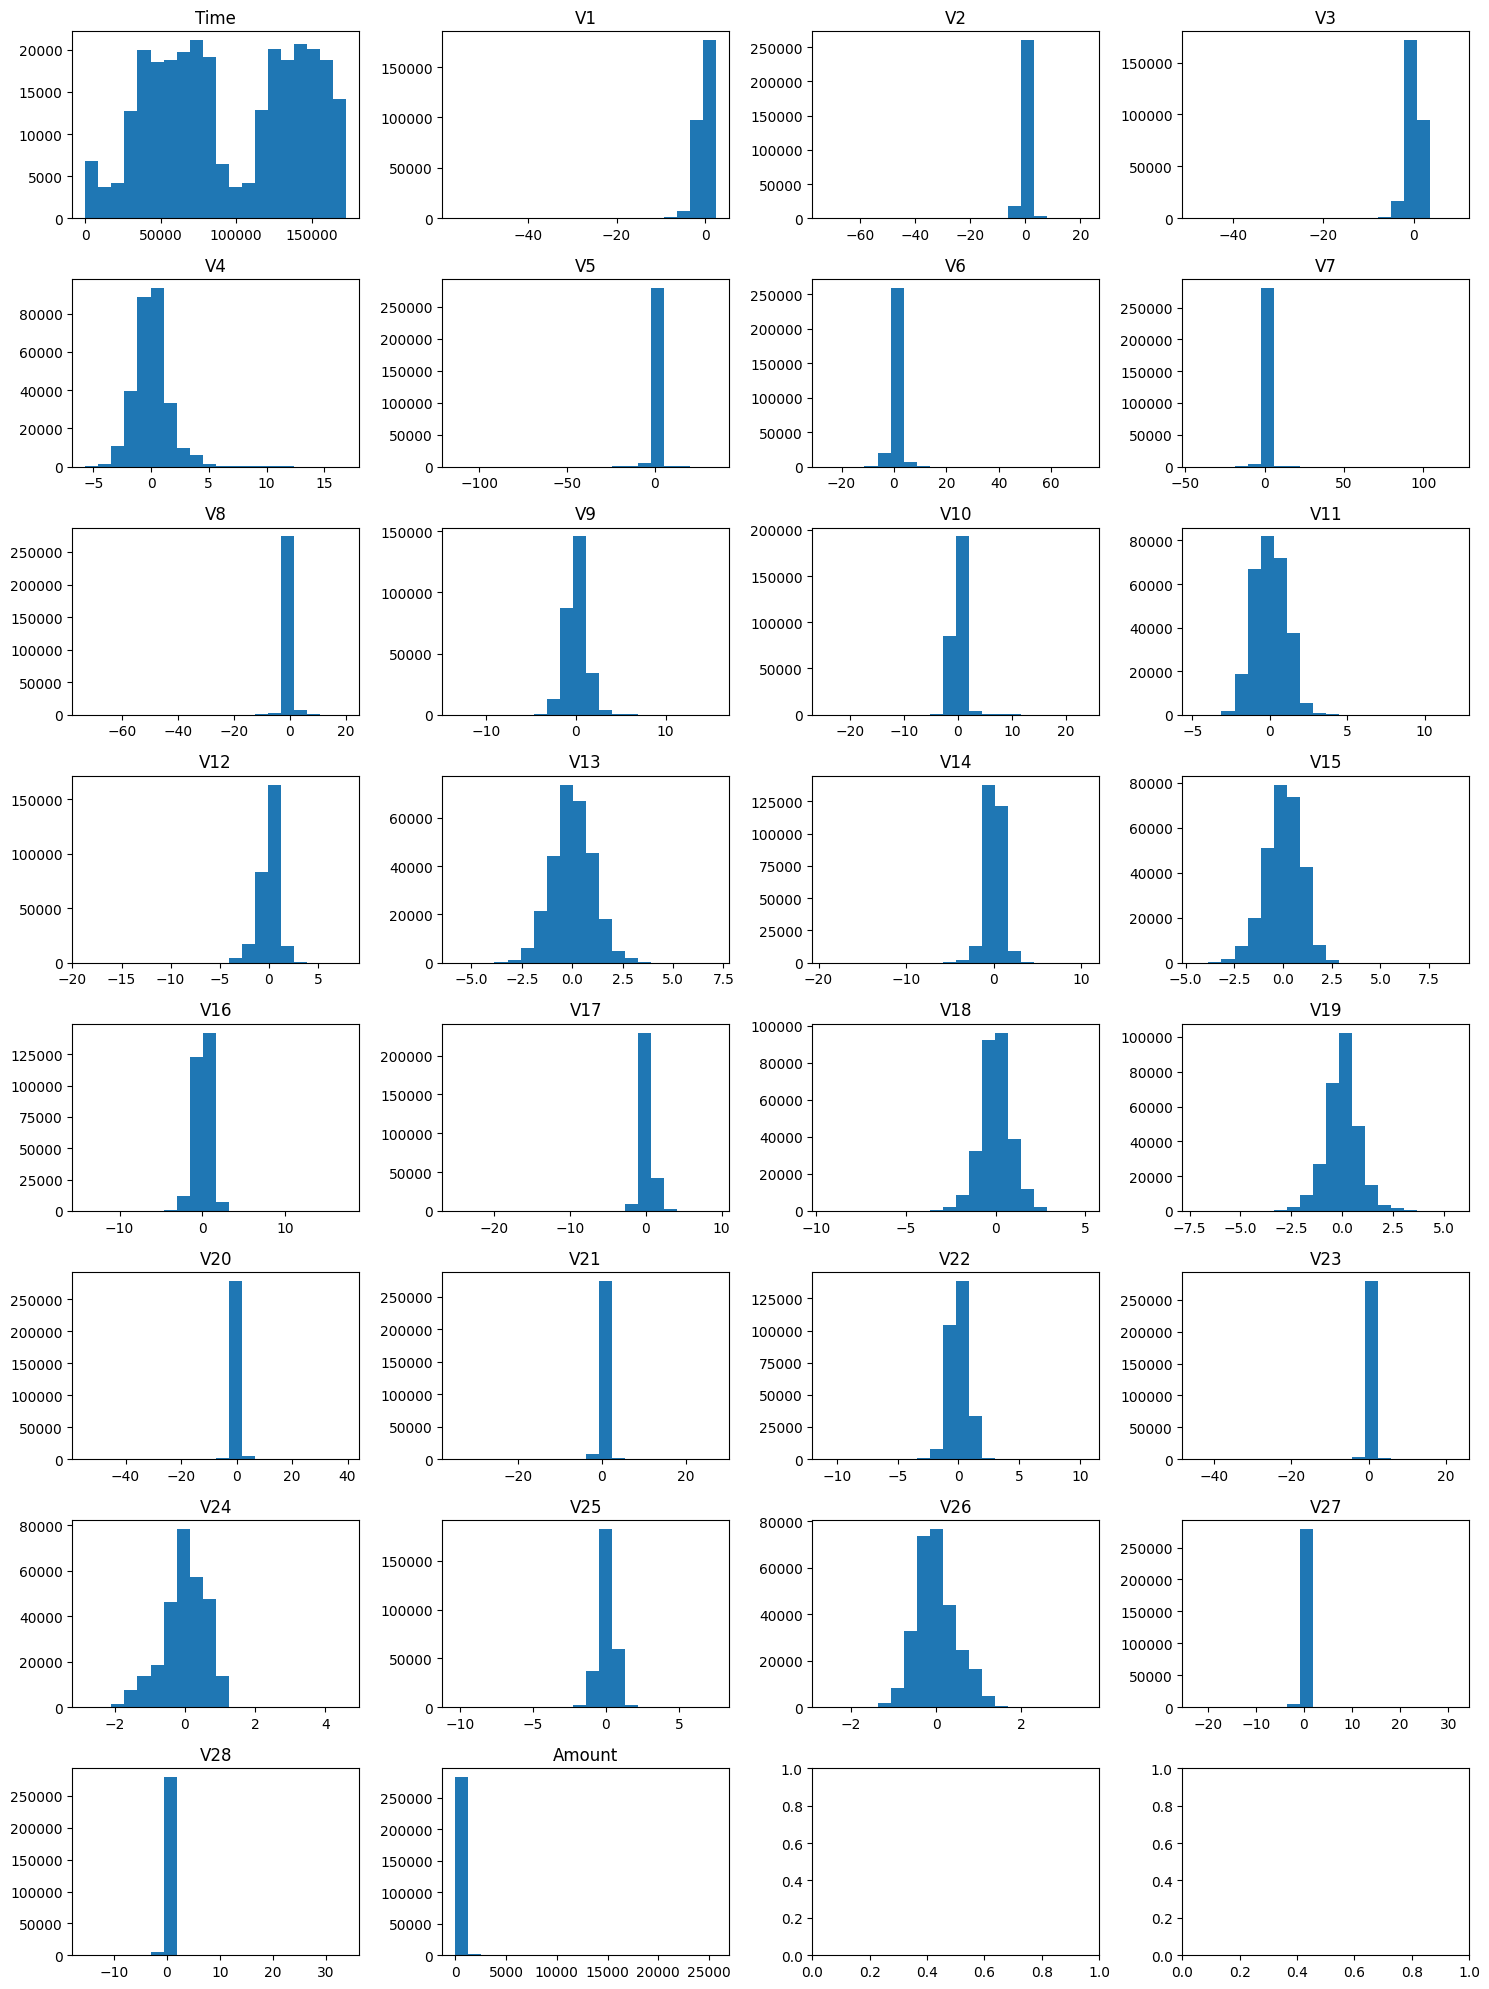

In [6]:
col = df.iloc[:,:30]
fig,axes = plt.subplots(8,4,figsize=(15,20))
axes= axes.flatten()

for i,s in enumerate(col):
    axes[i].hist(col[s],bins=20)
    axes[i].set_title(s)

plt.tight_layout()
plt.show()

# <b>Univariate Analysis :(<b>

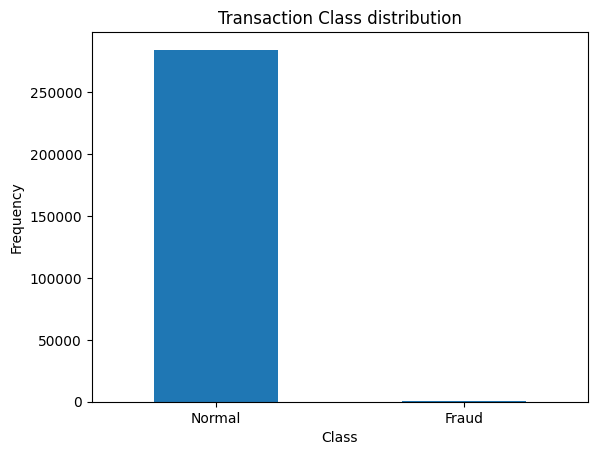

In [7]:
count_class = pd.value_counts(df['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Transaction Class distribution')
plt.xticks(range(2),labels=['Normal','Fraud'])
plt.ylabel("Frequency")
plt.show()


<b>Observation: 
* In the transaction there are few fraud transaction.<b>

# <b>Bivariate Analysis :)<b>

In [8]:
Fraud = df[df['Class']==1]
Fraud.shape

(492, 31)

In [9]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
Normal = df[df['Class']==0]
Normal.shape

(284315, 31)

In [11]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

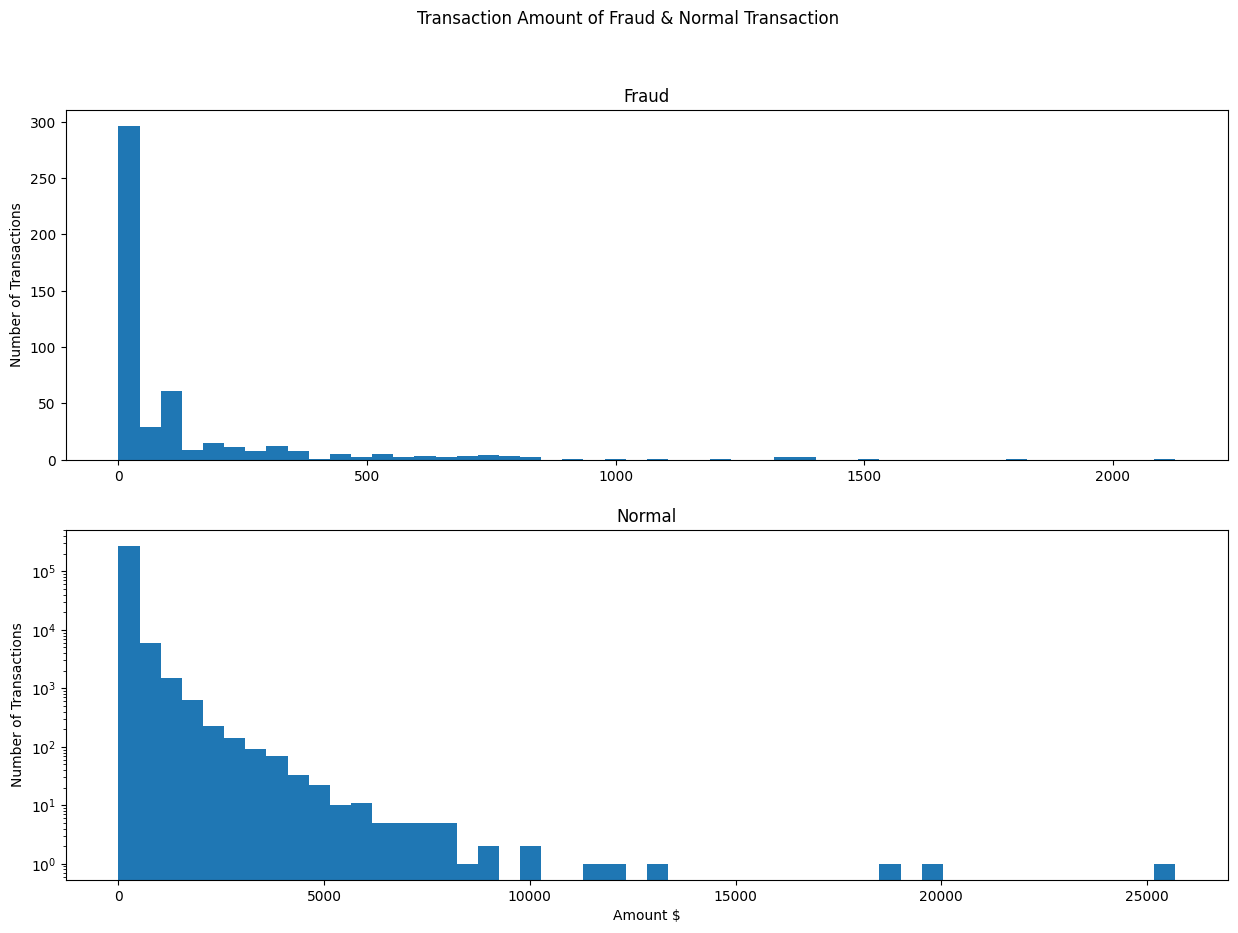

In [12]:
fig,axes = plt.subplots(2,1,figsize=(15,10))
fig.suptitle('Transaction Amount of Fraud & Normal Transaction')
axes[0].hist(Fraud.Amount,bins=50)
axes[1].hist(Normal.Amount,bins=50)
axes[0].set_title('Fraud')
axes[1].set_title('Normal')
axes[0].set_ylabel('Number of Transactions')
axes[1].set_ylabel('Number of Transactions')
plt.xlabel('Amount $')
plt.yscale('log')
plt.show()

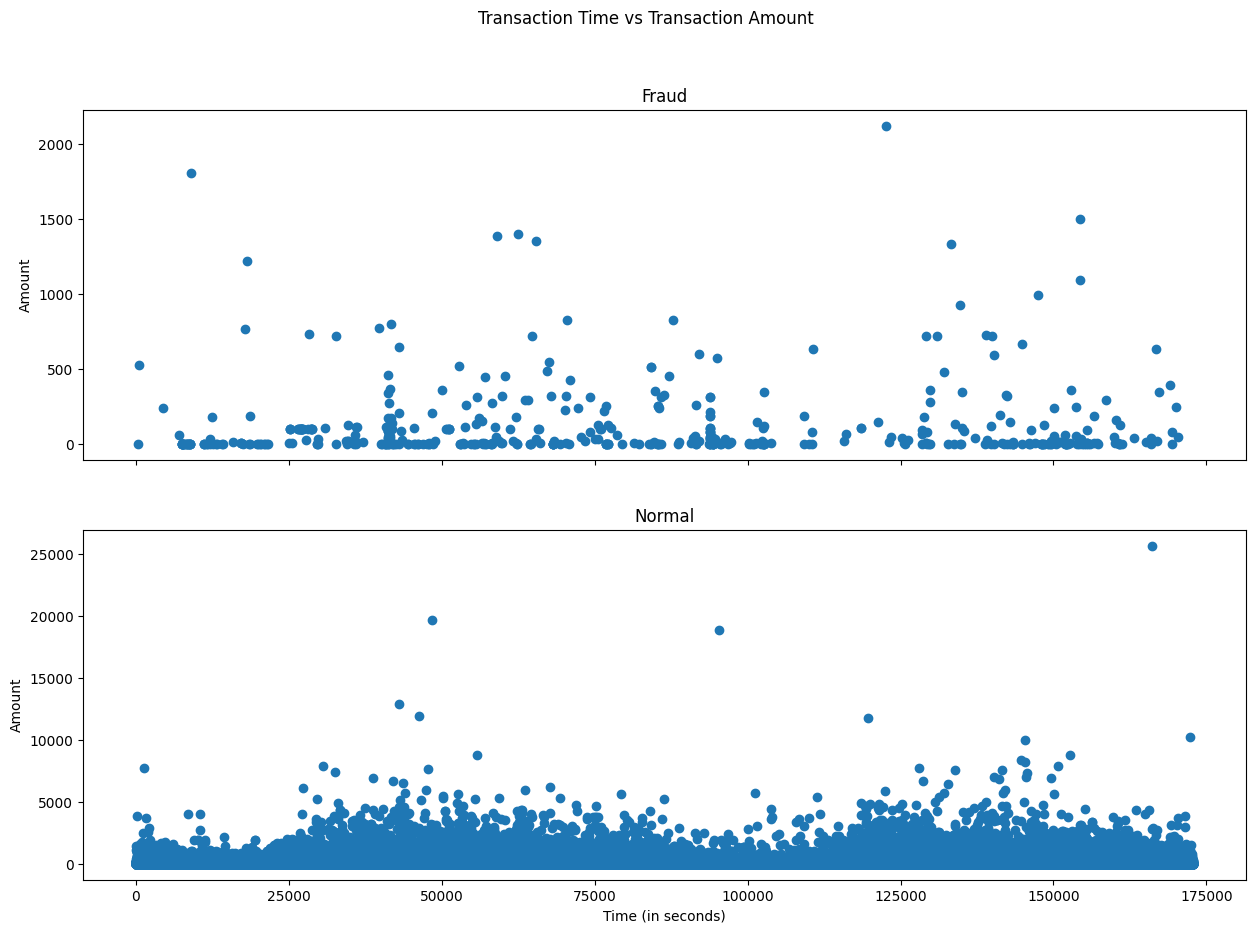

In [13]:
fig,axes = plt.subplots(2,1,figsize=(15,10),sharex=True)
axes[0].scatter(Fraud.Time,Fraud.Amount)
axes[1].scatter(Normal.Time,Normal.Amount)
axes[0].set_title('Fraud')
axes[1].set_title('Normal')
axes[0].set_ylabel('Amount')
axes[1].set_ylabel('Amount')
plt.xlabel('Time (in seconds)')
fig.suptitle('Transaction Time vs Transaction Amount')
plt.show()

<b> Observation: 
* The fraudulent transaction is easily seen,those data point are detached from normal transaction data point.  <b>

# <b>Model Evaluation :)<b>

In [14]:
X= df.drop(columns='Class',axis=1)
y= df['Class']

In [15]:
print(X.shape,y.shape)

(284807, 30) (284807,)


In [16]:
scale= StandardScaler()
X_scaled = scale.fit_transform(X)

In [17]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=125, max_samples=len(X),contamination=0.02,random_state=42),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',p=2,contamination=0.02),
    "Principle Component Analysis":PCA(n_components=3)
}

In [18]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_scaled)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Principle Component Analysis":
        X_pca = clf.fit_transform(X_scaled)
        pca_anomaly_threshold = np.percentile(X_pca, 99, axis=0)
        y_pred = np.any(X_pca > pca_anomaly_threshold, axis=1).astype(int)
    else:    
        clf.fit(X_scaled)
        scores_prediction = clf.decision_function(X_scaled)
        y_pred = clf.predict(X_scaled)

    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions.
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()

    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    Accuracy_Score = accuracy_score(y,y_pred)
    print(f"{Accuracy_Score:.2f}")
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 5385
0.98
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.07      0.82      0.13       492

    accuracy                           0.98    284807
   macro avg       0.54      0.90      0.56    284807
weighted avg       1.00      0.98      0.99    284807

Local Outlier Factor: 6139
0.98
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.00      0.05      0.01       492

    accuracy                           0.98    284807
   macro avg       0.50      0.52      0.50    284807
weighted avg       1.00      0.98      0.99    284807

Principle Component Analysis: 492
1.00
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accurac

# <b>Observations :)
* Isolation Forest detected 5385 errors,
* Local Outlier Factor detecting 6139 errors,
* PCA detecting 492 errors.
* PCA is 100% accurate to detect fraud transaction.Isolation forest and Local Outlier Factor are both 98% accuracy.
<b>